In [1]:
import pandas as pd
import numpy as np 
import plotly as plt 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df=pd.read_csv("Iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##### FIRST WE NEED TO SEE ANY MISSING VALUE ARE THERE OR NOT IF THERE WE WILL FIX WITH PREPROSSING

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop("Id", axis=1)

#### so we can see there is no null value therefore we don't need any preprossing

In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

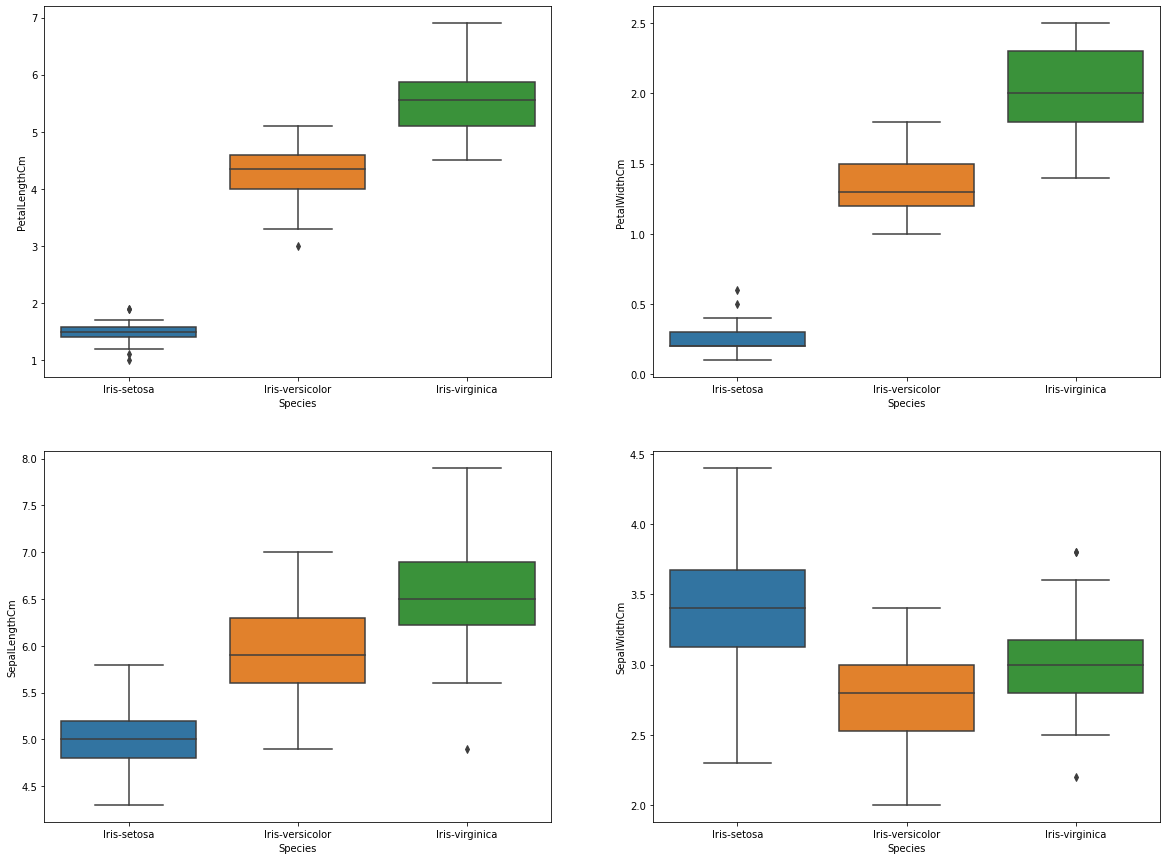

In [7]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df);

####  I AM CHANGING THE SPECIES TO NUMERIC BECAUSE I AM TRYING TO ACHIVE A PREDICTION WITH MACHINE LEARNING MODEL

In [8]:
df["Species"].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3}, inplace = True)

In [9]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [10]:
df["Species"].unique()

array([1, 2, 3])

### ENTERING INTO MACHINE LEARNING MODELING

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

In [12]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
70,5.9,3.2,4.8,1.8
147,6.5,3.0,5.2,2.0
7,5.0,3.4,1.5,0.2
127,6.1,3.0,4.9,1.8
38,4.4,3.0,1.3,0.2
...,...,...,...,...
108,6.7,2.5,5.8,1.8
89,5.5,2.5,4.0,1.3
111,6.4,2.7,5.3,1.9
133,6.3,2.8,5.1,1.5


In [16]:
y_train

70     2
147    3
7      1
127    3
38     1
      ..
108    3
89     2
111    3
133    3
36     1
Name: Species, Length: 120, dtype: int64

### FIRST WE WILL TRY Decision Tree THEN KNN 

Here is the image how decision tree work

![alt text](https://edrawcloudpublicus.s3.amazonaws.com/work/1905656/2023-2-20/1676866692/main.png)

In [17]:
dtcf = DecisionTreeClassifier()

In [18]:
dtcf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = dtcf.predict(X_test)

In [20]:
accuracy_dt = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt*100,"%")

Accuracy: 93.33333333333333 %


### NOW WE WILL TRY KNN

Here is the image how knn work

![alt text](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning5.png)

In [21]:
k = 2  # Choose the value of k (number of neighbors)
knn = KNeighborsClassifier(n_neighbors=k)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [23]:
ypred = knn.predict(X_test)

In [24]:
accuracy_knn =  metrics.accuracy_score(y_test, ypred)
print("Accuracy:", accuracy_knn*100 ,"%")

Accuracy: 93.33333333333333 %


In [27]:


model_names = ['DecisionTreeClassifier', 'KNN']
accuracies = [accuracy_dt, accuracy_knn]

data = {'Model': model_names, 'Accuracy': accuracies}
df = pd.DataFrame(data)

print(df)


                    Model  Accuracy
0  DecisionTreeClassifier  0.933333
1                     KNN  0.933333


# so we can say for our dataset KNN work best